In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
df = pd.read_excel('C:/Users/qdz91/OneDrive/Рабочий стол/project/3_Данные_для_задания_по_аналитике.xls')

In [42]:
df

ORG_NAME          REGION_NAME       L1       L2          L3  \
0     Организация 2149       Алтайский край  74.8507  72.1997  44242.8338   
1     Организация 2426       Алтайский край  17.6035  14.6967  13646.3538   
2     Организация 2462       Алтайский край  12.6514  11.7709   9230.5405   
3     Организация 3439       Алтайский край  16.0982  12.5173  12474.6834   
4     Организация 4273       Алтайский край  12.5306  11.1942  10531.3259   
...                ...                  ...      ...      ...         ...   
5955   Организация 965  Ярославская область   5.5270   5.2940   5557.0551   
5956   Организация 966  Ярославская область  12.9480  12.3460   8374.1974   
5957   Организация 967  Ярославская область  12.3520  12.0640   8251.9638   
5958   Организация 968  Ярославская область  16.6940  15.5420  10382.5149   
5959   Организация 969  Ярославская область  25.5530  22.8700  15957.3883   

           L4          L5        L6      VTOP_NAME         L7      L8  
0     384.890  32002.7611  10415.46  газ природный  3453.7000  37.000  
1      19.370   8783.9926   2421.18  газ природный  1089.0000  10.400  
2       3.750   5660.0720   1836.97  газ природный  1620.2091  15.666  
3     114.200   5518.0897   3842.44          уголь  2887.2000  38.000  
4      53.430   4561.1628   3712.76          уголь  1858.5300  22.580  
...       ...         ...       ...            ...        ...     ...  
5955  259.594   2450.2609    759.50  газ природный   680.4000   8.000  
5956  104.814   5182.1885   1838.19  газ природный   924.7680  12.000  
5957   67.460   4881.7941   1745.68  газ природный  1560.0000  13.000  
5958  160.741   6584.7023   2335.68  газ природный  1344.4200  15.000  
5959  270.908   9675.6803   3473.95  газ природный  2196.9850  19.000  

[5960 rows x 11 columns]

### 1. Проанализировать по организациям и по регионам стоимость услуг теплоснабжения

стоимость услуг тесплоснабжения по организации = Расход + Валовая прибыль/объем полезного отпуска

#### Стоимость услуг теплоснабжения по регионам

In [43]:
# Посмотрим сколько уникальных организаций
# И исходя из этого определим нужно ли группировать данные
print(f'{df["ORG_NAME"].nunique()} - Количество уникальных организаций совпадает с количеством строк в фрейме данных, равному {df.shape[0]}')

5960 - Количество уникальных организаций совпадает с количеством строк в фрейме данных, равному 5960


#### Стоимость услуг теплоснабжения по организациям

In [44]:
df['service_price_by_organization'] = (df["L3"] + df["L5"] + df["L7"] + df["L4"])/df["L2"]

In [45]:
df

ORG_NAME          REGION_NAME       L1       L2          L3  \
0     Организация 2149       Алтайский край  74.8507  72.1997  44242.8338   
1     Организация 2426       Алтайский край  17.6035  14.6967  13646.3538   
2     Организация 2462       Алтайский край  12.6514  11.7709   9230.5405   
3     Организация 3439       Алтайский край  16.0982  12.5173  12474.6834   
4     Организация 4273       Алтайский край  12.5306  11.1942  10531.3259   
...                ...                  ...      ...      ...         ...   
5955   Организация 965  Ярославская область   5.5270   5.2940   5557.0551   
5956   Организация 966  Ярославская область  12.9480  12.3460   8374.1974   
5957   Организация 967  Ярославская область  12.3520  12.0640   8251.9638   
5958   Организация 968  Ярославская область  16.6940  15.5420  10382.5149   
5959   Организация 969  Ярославская область  25.5530  22.8700  15957.3883   

           L4          L5        L6      VTOP_NAME         L7      L8  \
0     384.890  32002.7611  10415.46  газ природный  3453.7000  37.000   
1      19.370   8783.9926   2421.18  газ природный  1089.0000  10.400   
2       3.750   5660.0720   1836.97  газ природный  1620.2091  15.666   
3     114.200   5518.0897   3842.44          уголь  2887.2000  38.000   
4      53.430   4561.1628   3712.76          уголь  1858.5300  22.580   
...       ...         ...       ...            ...        ...     ...   
5955  259.594   2450.2609    759.50  газ природный   680.4000   8.000   
5956  104.814   5182.1885   1838.19  газ природный   924.7680  12.000   
5957   67.460   4881.7941   1745.68  газ природный  1560.0000  13.000   
5958  160.741   6584.7023   2335.68  газ природный  1344.4200  15.000   
5959  270.908   9675.6803   3473.95  газ природный  2196.9850  19.000   

      service_price_by_organization  
0                       1109.203846  
1                       1601.632775  
2                       1402.999907  
3                       1677.212586  
4                       1519.040994  
...                             ...  
5955                    1690.085002  
5956                    1181.432683  
5957                    1223.575754  
5958                    1188.545760  
5959                    1228.725912  

[5960 rows x 12 columns]

#### Стоимость услуг теплоснабжения по регионам

In [46]:
# построить гистограмму данных
price_service_by_regions = df.groupby('REGION_NAME')['service_price_by_organization'].mean().to_frame().reset_index()
display(price_service_by_regions)

REGION_NAME  service_price_by_organization
0                    Алтайский край                    1698.836941
1                  Амурская область                    3512.054120
2             Архангельская область                    3229.699387
3              Астраханская область                    2067.055368
4              Белгородская область                    1647.220385
..                              ...                            ...
71  Ямало-Ненецкий автономный округ                    1802.869218
72              Ярославская область                    1781.328142
73                        г. Москва                    1716.966177
74                       г.Байконур                    4056.874847
75                г.Санкт-Петербург                    1649.044721

[76 rows x 2 columns]

In [47]:
df = df.merge(price_service_by_regions, left_on='REGION_NAME', right_on='REGION_NAME')
df.rename(columns={'service_price_by_organization_x': 'service_price_by_organization', 
                   "service_price_by_organization_y": 'service_price_by_region'}, inplace=True)

### Анализ признаков(фичей) и анализ влияния признаков на стоимость услуг теплоснабжения

#### Оценим переменные на выбросы, посмотрим на гистограмму и посмотрим основные описательные статистики

In [48]:
interval_columns_list = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8']

In [49]:
df[interval_columns_list].describe()

L1           L2            L3            L4            L5  \
count  5960.000000  5960.000000  5.960000e+03   5960.000000  5.960000e+03   
mean     31.163906    27.642371  2.643767e+04    666.480401  1.407726e+04   
std      96.191064    85.611600  7.200120e+04   3035.441142  4.232179e+04   
min       0.029400     0.029300  4.294400e+01      0.030000  1.987010e+01   
25%       2.272925     1.965200  2.939265e+03     41.780000  1.184764e+03   
50%       7.558750     6.701950  8.085916e+03    125.141000  3.753505e+03   
75%      23.458500    20.811600  2.239192e+04    406.472500  1.112866e+04   
max    2442.874100  2357.297500  1.589547e+06  98395.708100  1.105530e+06   

                  L6             L7           L8  
count    5960.000000    5960.000000  5960.000000  
mean     5089.142279    3254.493337    25.140672  
std     14072.441117    8319.391377    49.697410  
min         5.931400       4.557900     0.070800  
25%       511.875000     538.136250     6.000000  
50%      1433.800000    1222.397000    12.000000  
75%      4161.567750    2929.357500    25.000000  
max    328228.000000  193743.000000  1049.500000

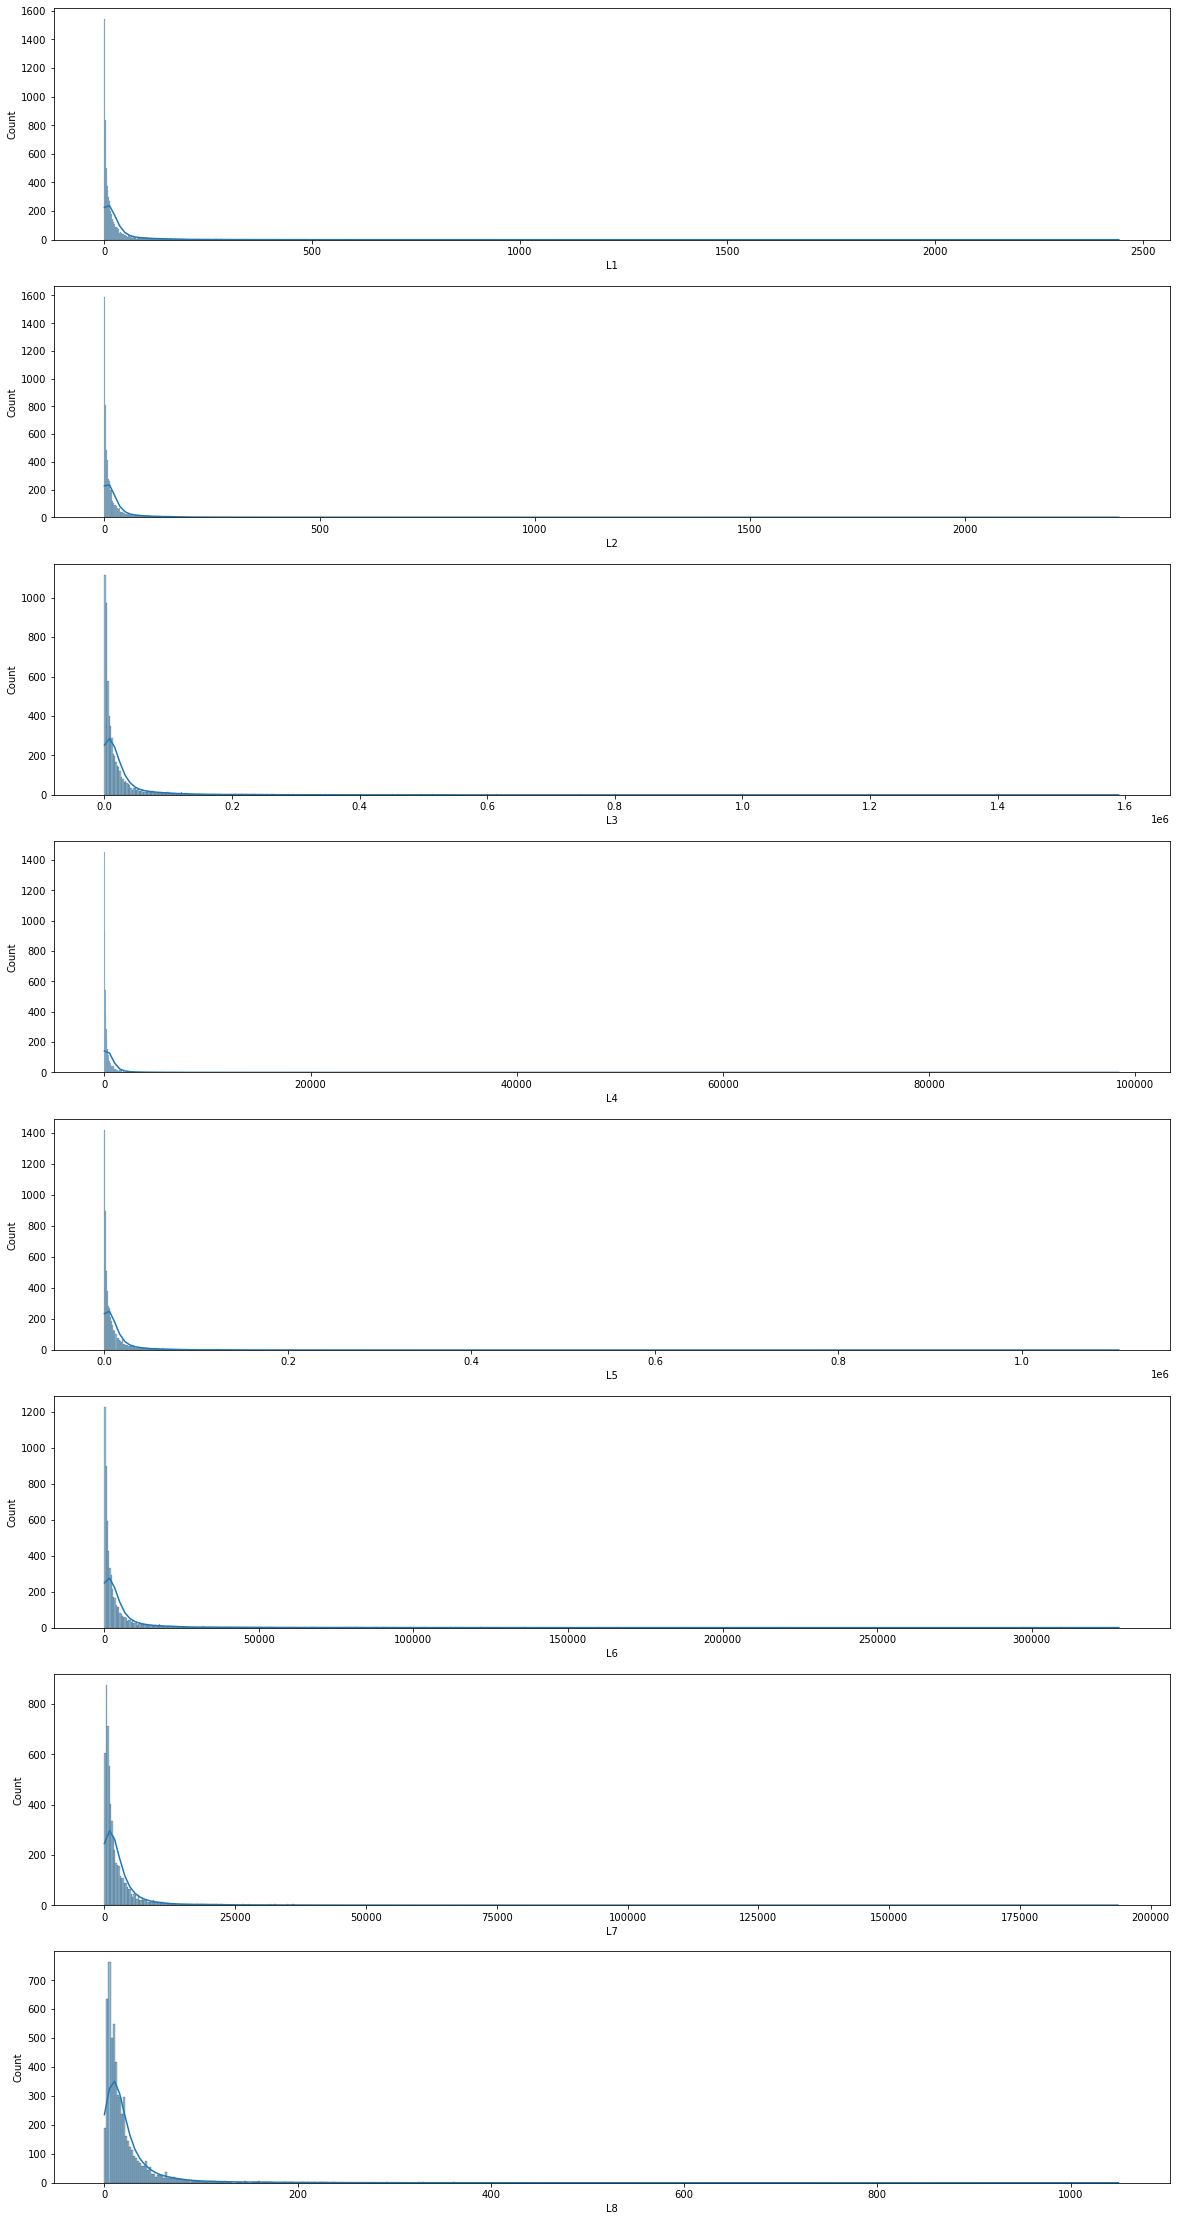

Wall time: 21.2 s


In [50]:
%%time
fig = plt.figure(figsize=(20,40))
rows = len(interval_columns_list)
ax_list = []

for i in range(1, len(interval_columns_list)+1):
    ax_list.append(fig.add_subplot(rows, 1, i))
    
def func_2(df, count):
    for i in range(len(interval_columns_list)):
        IQR = stats.iqr(df[interval_columns_list[i]], interpolation = 'midpoint')
        binwidth = 2*IQR/(df.shape[0])**(1/3)

        sns.histplot(data=df[[interval_columns_list[i]]],
                ax=ax_list[count],
                binwidth=binwidth,
                kde=True,
                x=interval_columns_list[i])
        count += 1


        
func_2(df, 0)
plt.show()

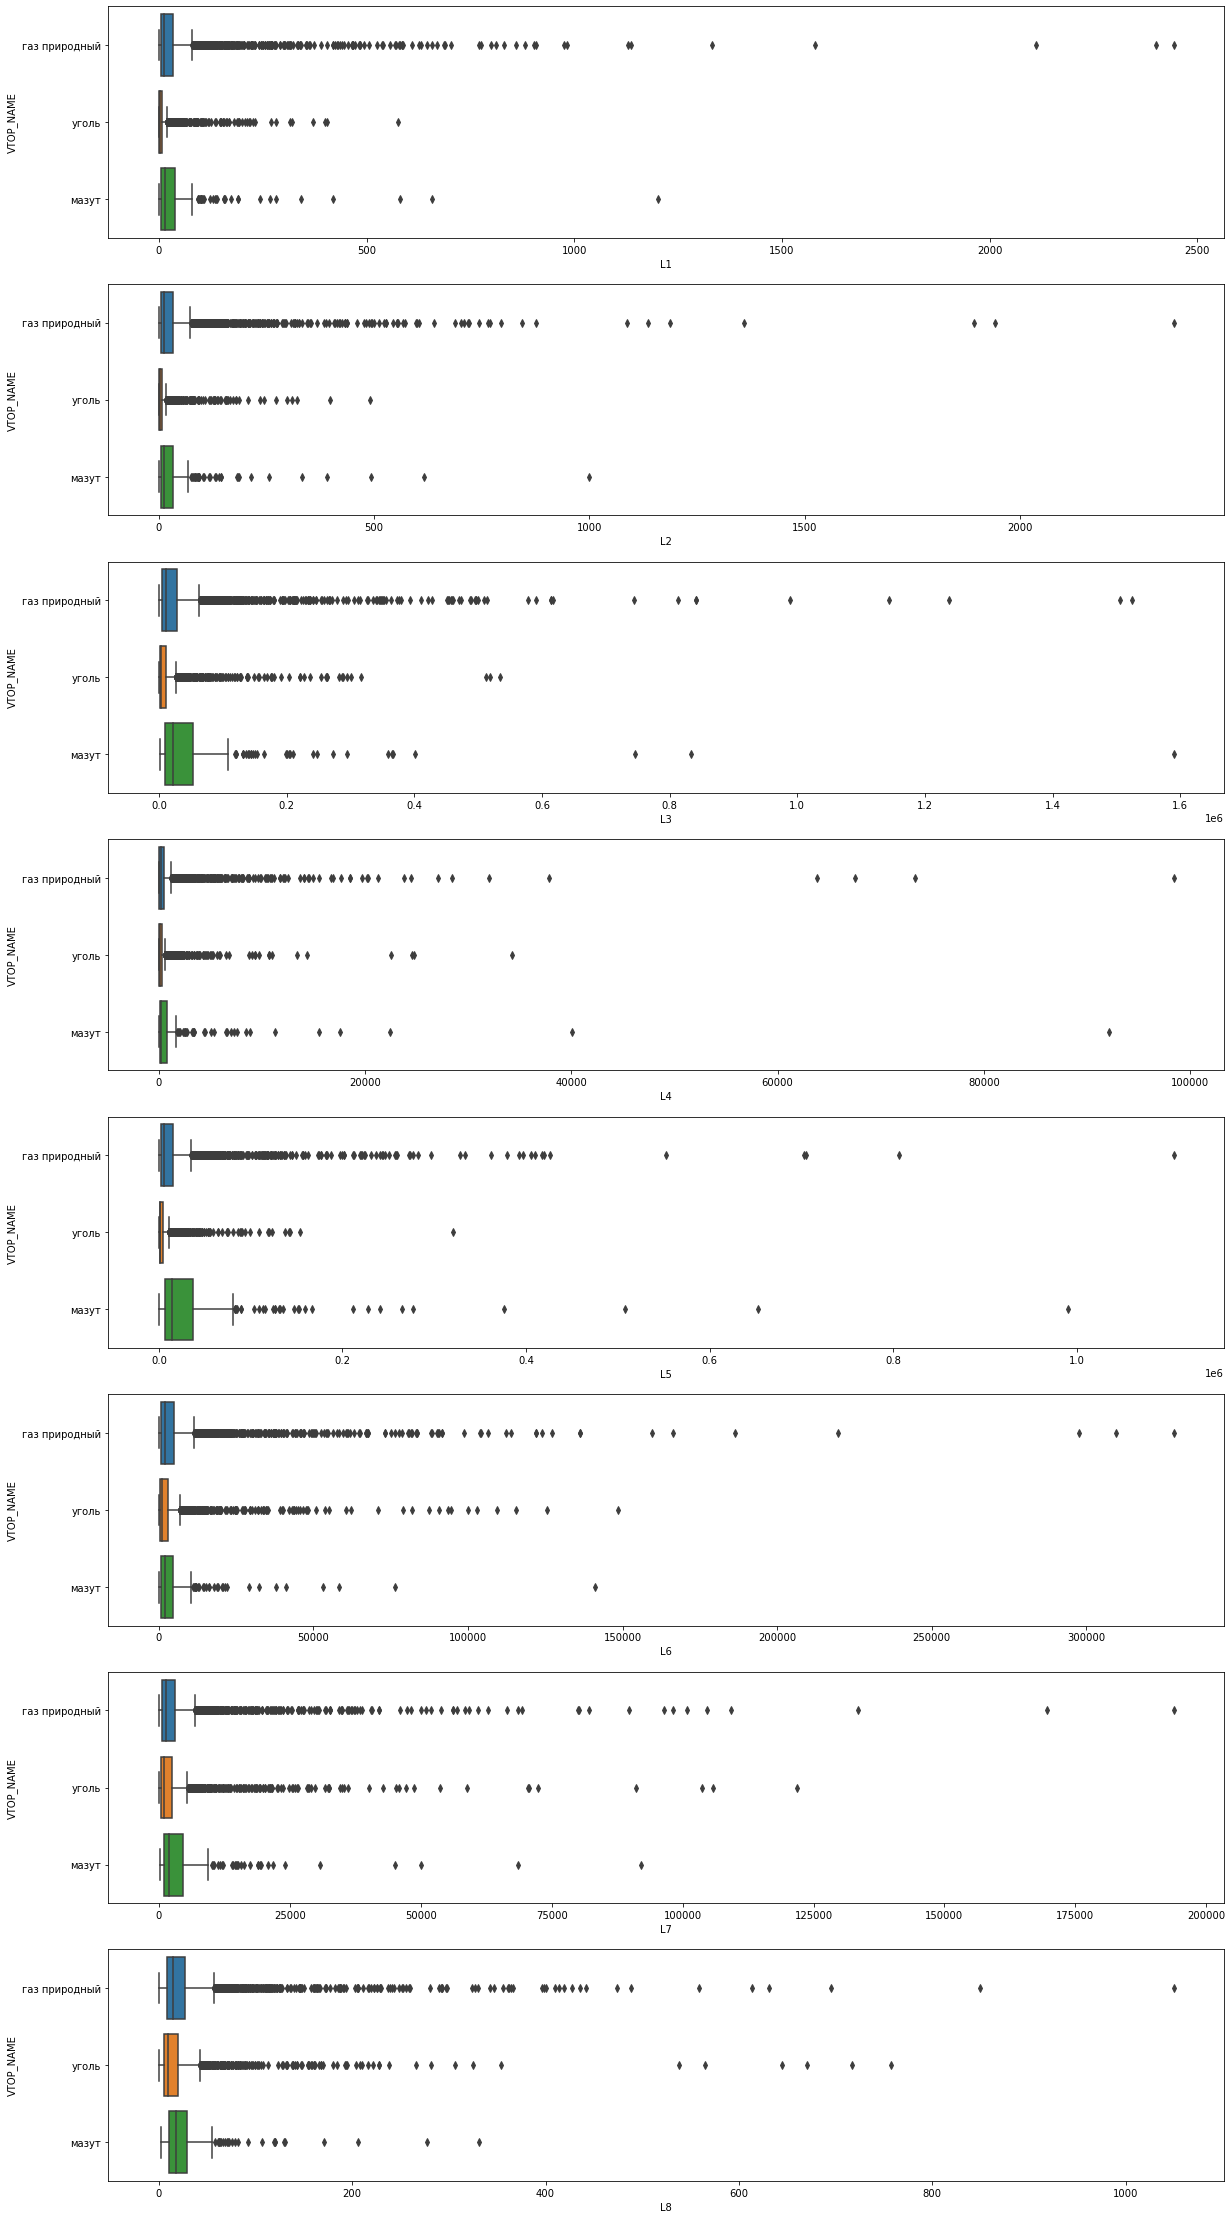

Wall time: 1.25 s


In [51]:
%%time
fig = plt.figure(figsize=(20,40))
rows = len(interval_columns_list)
ax_list = []

for i in range(1, len(interval_columns_list)+1):
    ax_list.append(fig.add_subplot(rows, 1, i))

def func_1(df, count):
    for j in range(len(interval_columns_list)):
        IQR = stats.iqr(df[interval_columns_list[j]], interpolation = 'midpoint')
        binwidth = 2*IQR/(df.shape[0])**(1/3)

        sns.boxplot(x = interval_columns_list[j],
            y = 'VTOP_NAME',
            ax=ax_list[count],
            data=df)
        count += 1
        
func_1(df, 0)
plt.show()

Явно понятно в том числе и по данным, что содержатся выбросы, возможно, причина наличия которых в том, что имеется смесь данных в зависимсти от региона и типа топлива, что может влиять на затраты и другие факторы(признаки).

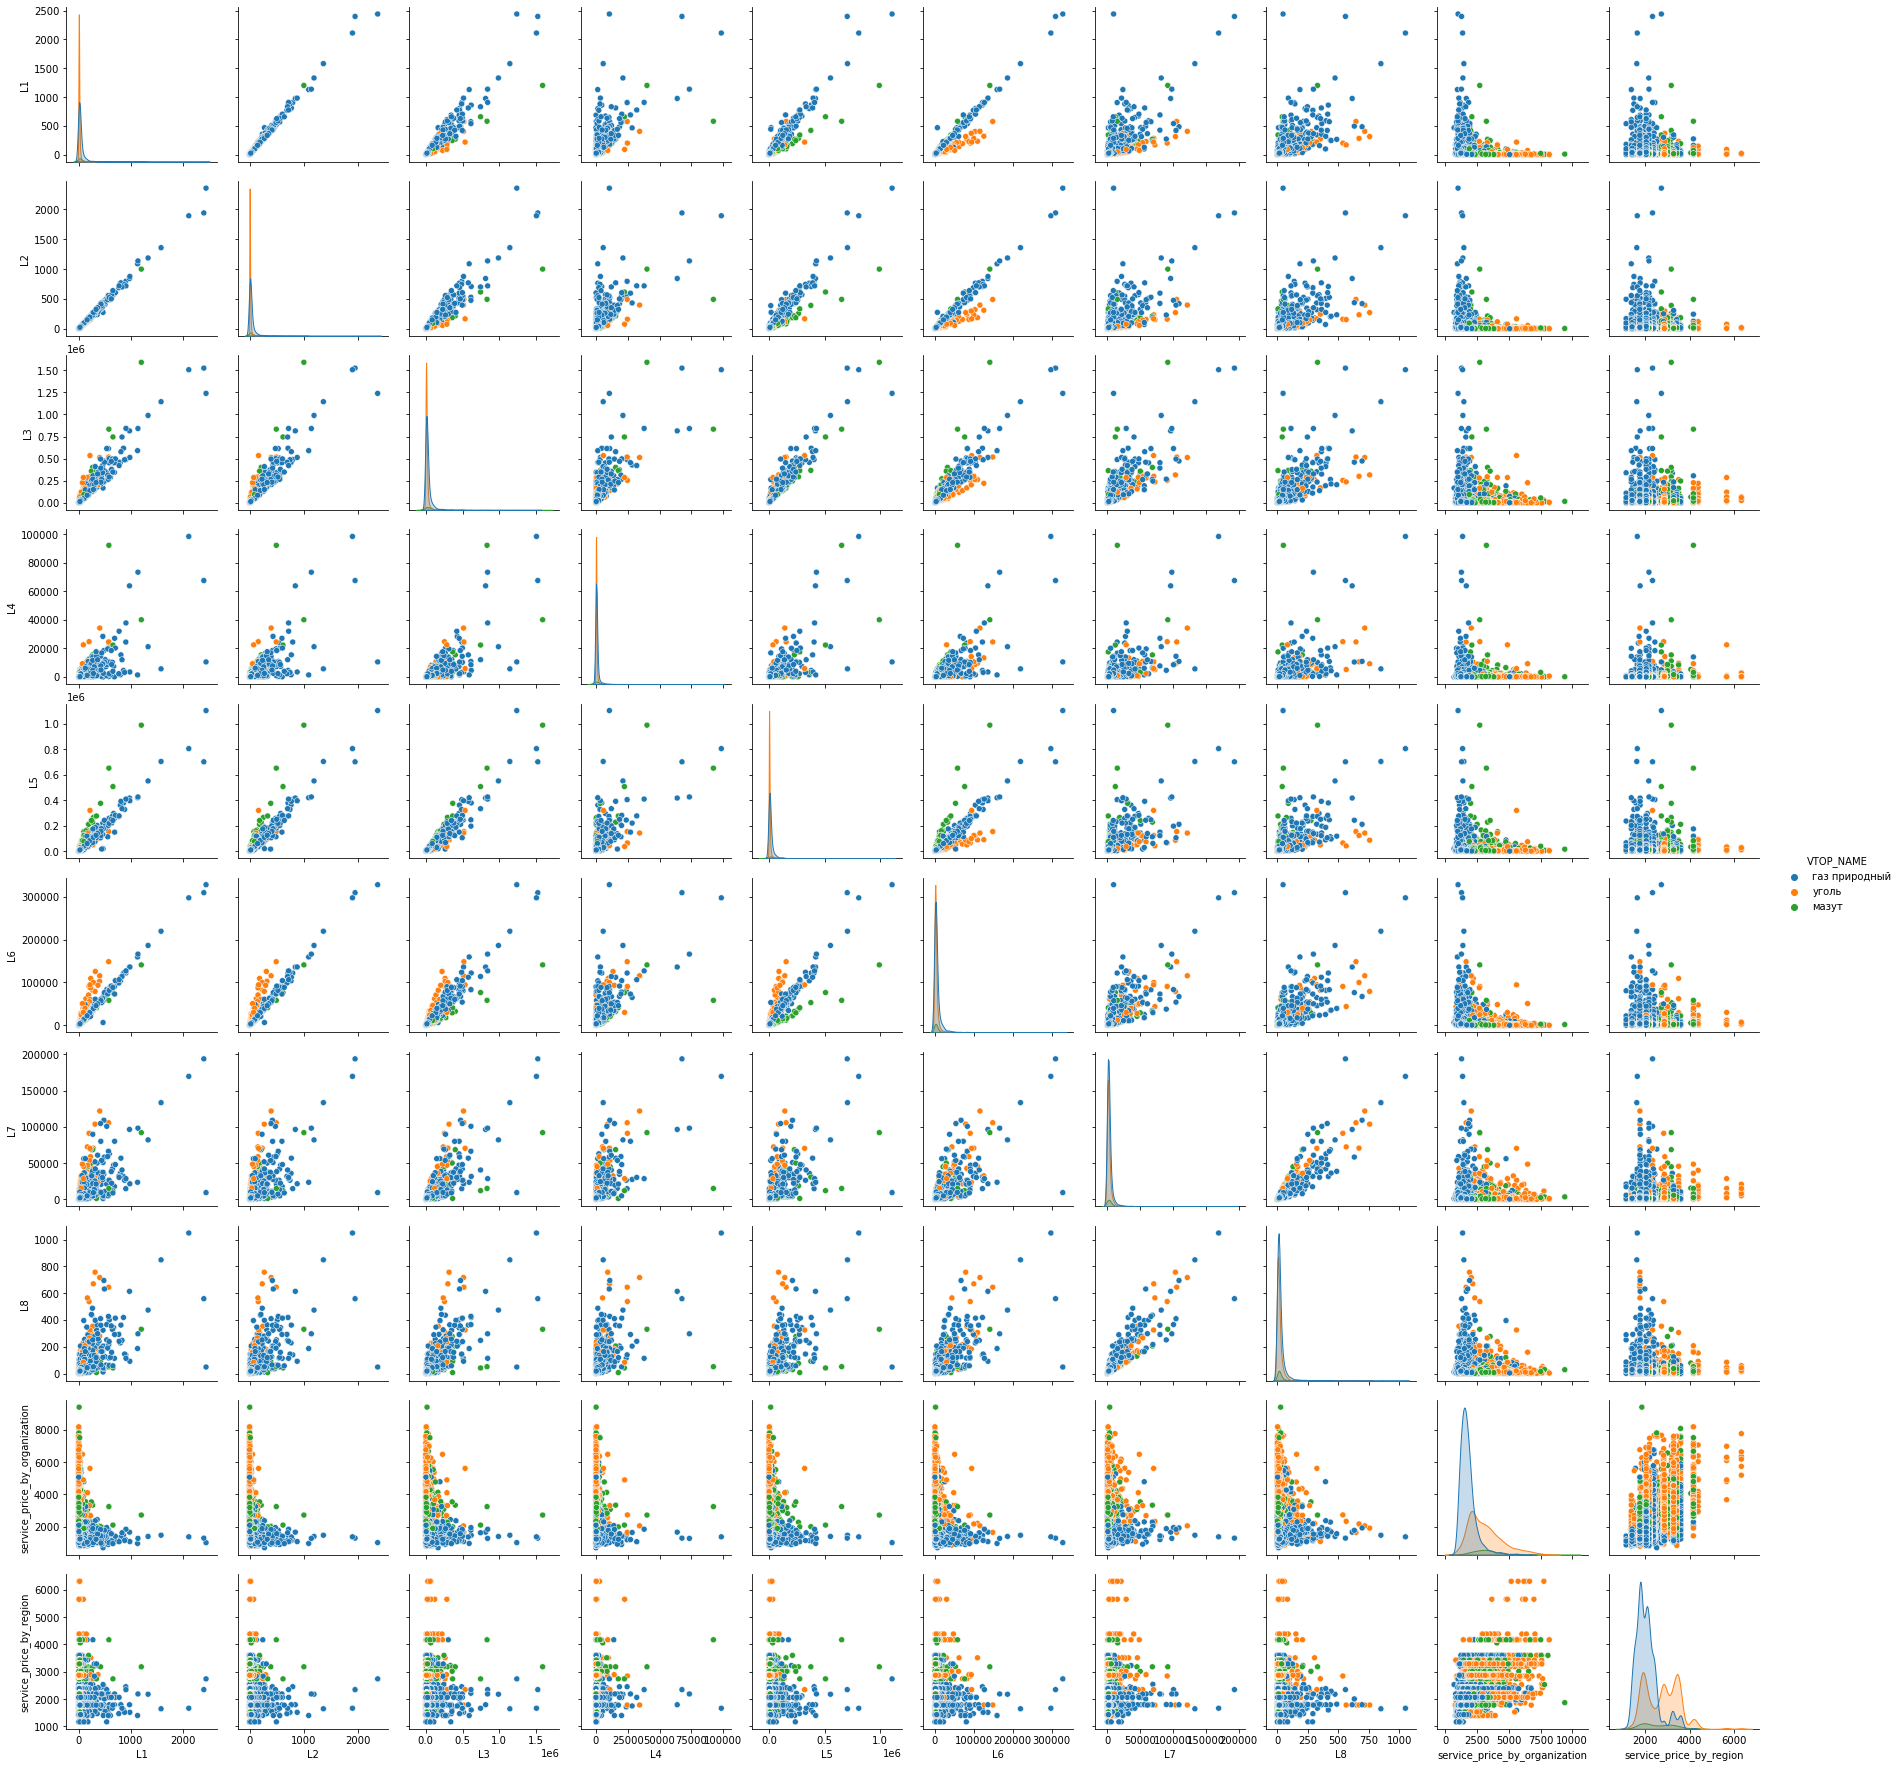

In [52]:
sns.pairplot(df, 
         diag_kind="kde",
         hue='VTOP_NAME')


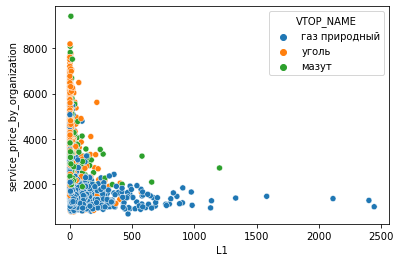

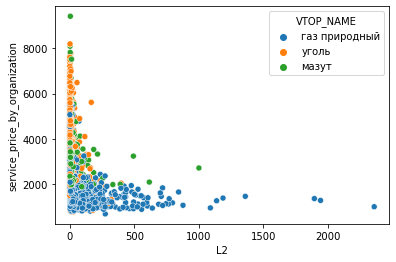

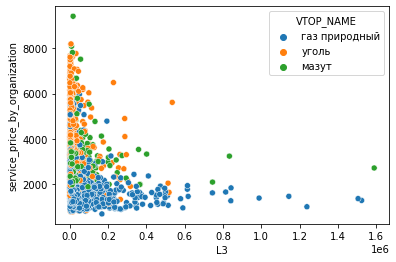

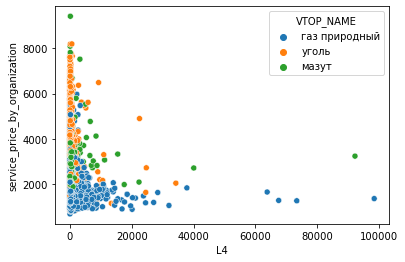

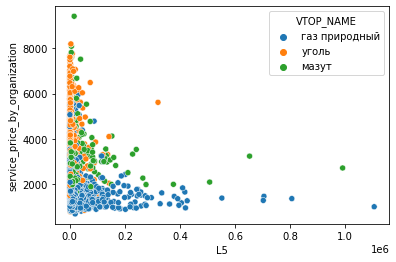

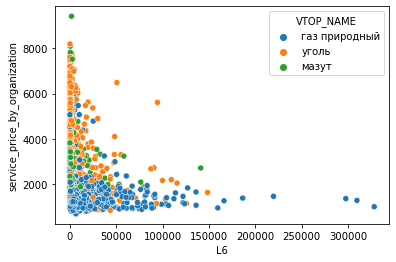

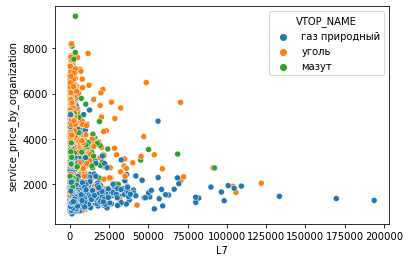

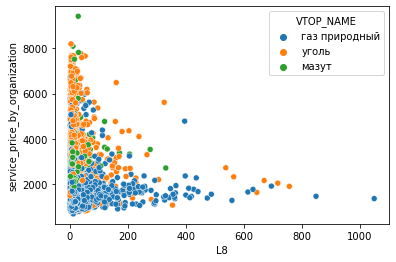

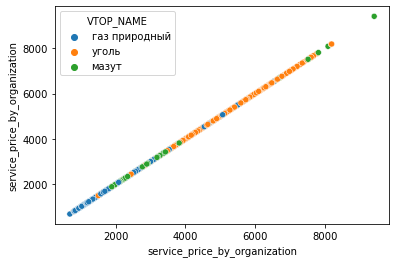

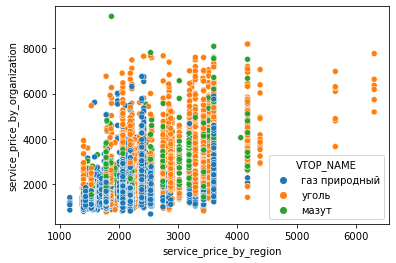

In [53]:
for label, name_column in enumerate(interval_columns_list + ['service_price_by_organization', 'service_price_by_region']):
    sns.scatterplot(x=name_column, 
                    y='service_price_by_organization', 
                    data=df,
                    hue='VTOP_NAME')
    plt.show()

In [54]:
X_log = np.log(df[interval_columns_list+['service_price_by_organization']])

df_interval_features = pd.DataFrame(X_log)
df_interval_features['VTOP_NAME'] = df['VTOP_NAME']

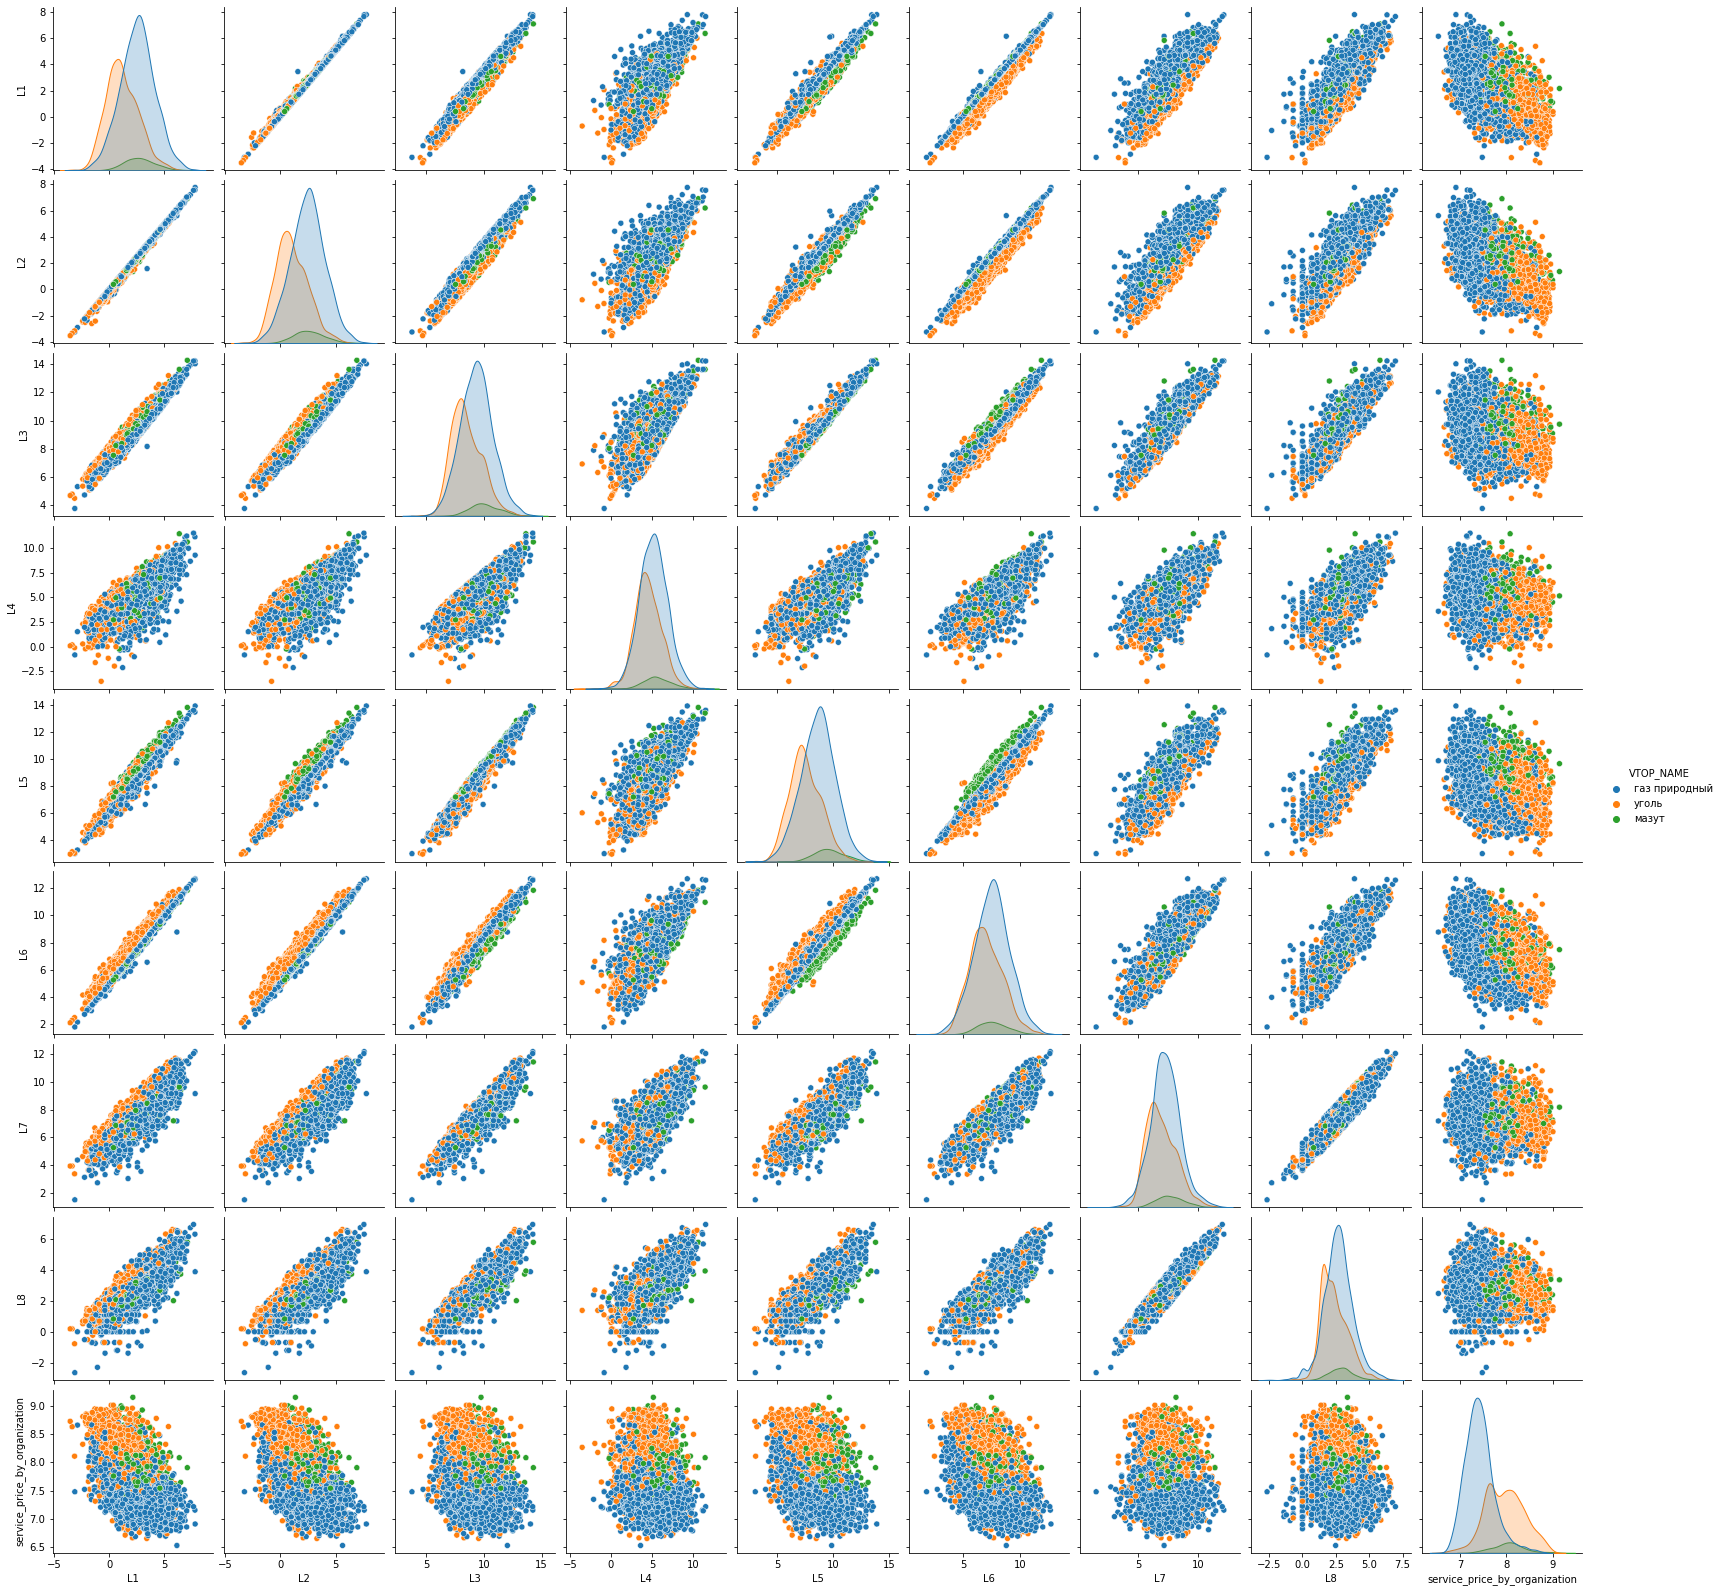

In [55]:
sns.pairplot(df_interval_features, 
         diag_kind="kde",
         hue='VTOP_NAME')

Так же при логарифмировании по причине гетероскедостачности более явно проглядывается корреляция между некторыми прзнаками.

    Используем коэффициент корреляции Спирмена, так как видно, что взаимосвязь между целевой переменной(стоимость услуг за теплоснабжение) и другими признаками(факторами) нелинейная и распределения в количественных признаках содержит аномалии ввиде длинного хвоста на гистограмме.

In [56]:
threshold = 0.4
for name in interval_columns_list:
    corr, pval = stats.spearmanr(df['service_price_by_organization'], df[name])
    corr_tau, pval_tau = stats.kendalltau(df['service_price_by_organization'], df[name])
    if threshold < abs(corr):
        print(f'Коэ-т корреляции Спирмена = {corr} и p-value = {pval} для столбцов service_price_by_organization и {name}')
        print(f'Коэ-т корреляции Тау Кендалла = {corr_tau} и p-value = {pval_tau} для столбцов service_price_by_organization и {name}')
        print()

Коэ-т корреляции Спирмена = -0.571997112492569 и p-value = 0.0 для столбцов service_price_by_organization и L1
Коэ-т корреляции Тау Кендалла = -0.4044290391569652 и p-value = 0.0 для столбцов service_price_by_organization и L1

Коэ-т корреляции Спирмена = -0.594137305069492 и p-value = 0.0 для столбцов service_price_by_organization и L2
Коэ-т корреляции Тау Кендалла = -0.4223239844644834 и p-value = 0.0 для столбцов service_price_by_organization и L2

Коэ-т корреляции Спирмена = -0.44869261925468396 и p-value = 3.330624011218743e-293 для столбцов service_price_by_organization и L5
Коэ-т корреляции Тау Кендалла = -0.31425663654894637 и p-value = 8.591049623511683e-290 для столбцов service_price_by_organization и L5

Коэ-т корреляции Спирмена = -0.44564883753981627 и p-value = 8.464546755300946e-289 для столбцов service_price_by_organization и L6
Коэ-т корреляции Тау Кендалла = -0.30885967271793746 и p-value = 5.3800746865132e-280 для столбцов service_price_by_organization и L6



#### Рассуждения:

Данные коэ-ты говорят, что с увеличением объемов выроботки теплоэнергии и повышением объем полезного отпуска, несколько понижается стоимость услуг. Тогда можно предположить, что при повышении выроботки полезной теплоэнергии мы понижем нашу стоимость услуг, так же с увеличением объма полезного отпуска, речь идет о меньших потерях тепла, что возможно дает понижение стоимости услуг также.

"Следует учитывать, что величина тарифа зависит от эффективности использования (загрузки) мощностей теплоснабжающей организации. При низкой загрузке, т.е. значительно меньше установленной, на единицу вырабатываемой тепловой энергии приходится больше затрат на её производство".

"Помимо того, для котельных, функционирующих на одинаковом виде топлива, разница в тарифах на тепло может быть обусловлена и уровнем энергоемкости установленного оборудования, другими особенностями технологического процесса производства и передачи тепловой энергии."

Так же можно увидеть менее значительную(отрительную) корреляцию между расходами на топливо и объёмом используемого топлива со стоимостью за улуги. Это объясняется тем, что между признаками L2 и L5, и L2 и L6 Присутствует сильна положительная корреляция. Это приводит к тому, что с повышением объёма полезного отпуска(L2)(который положительной сказывается на тарифах энергопотребления, для потребилетей конечно) увеличивается расход топлива(L5) и его используемый объем(L6), что влечет к небольшой негативной корреляции между расходом и объмом со стоимостью за услуги труда. Это выглядит подозрительно, так как повышенные расходы не должны влиять на стомость услуг в позитивную сторону(чем больше тратим, тем меньше стоят услуги). Возможно это объясняется тем, что налаженный процесс преобразования топлива в тепло влияет на более высокий отпуск полезного тепла, что перекрывает расходы.

Следовательно, простраивается следующая логическая цепочка: при повышении расходов на топливо и объёма топлива(при налаженной системе преобразования и передачи телпа), повышается объем выроботки полезной теплоэнергии и соответственно стоимость за услуги понижается.

Остальные значения корреляции между количетсвенными признаками и целевой переменной по коэ-ту Спирмена не значительны. Явно видно, что между признаками и целевой переменной нет линейной связи. Так же возможно наличие гетероскедастичности между различными признаками.

### 2. Анализ эффективности деятельности организаций

In [57]:
df.head()

ORG_NAME     REGION_NAME       L1       L2          L3      L4  \
0  Организация 2149  Алтайский край  74.8507  72.1997  44242.8338  384.89   
1  Организация 2426  Алтайский край  17.6035  14.6967  13646.3538   19.37   
2  Организация 2462  Алтайский край  12.6514  11.7709   9230.5405    3.75   
3  Организация 3439  Алтайский край  16.0982  12.5173  12474.6834  114.20   
4  Организация 4273  Алтайский край  12.5306  11.1942  10531.3259   53.43   

           L5        L6      VTOP_NAME         L7      L8  \
0  32002.7611  10415.46  газ природный  3453.7000  37.000   
1   8783.9926   2421.18  газ природный  1089.0000  10.400   
2   5660.0720   1836.97  газ природный  1620.2091  15.666   
3   5518.0897   3842.44          уголь  2887.2000  38.000   
4   4561.1628   3712.76          уголь  1858.5300  22.580   

   service_price_by_organization  service_price_by_region  
0                    1109.203846              1698.836941  
1                    1601.632775              1698.836941  
2                    1402.999907              1698.836941  
3                    1677.212586              1698.836941  
4                    1519.040994              1698.836941

Оценим следующие параметры:

    1. ROI = (валовая прибыль организации(L4) / Затраты) × 100 %;
    2. Экономическая эффективность = Доход/Затраты

In [58]:
# Посчитаем метрики эффективности работы организации
df['Экономическая эффективность'] = (df['L4'] + df['L5'] + df['L7'] + df['L3'])/(df['L5'] + df['L7'] + df['L3'])
df['ROI'] = (df['L4']/(df['L5'] + df['L7'] + df['L3']))*100

In [59]:
df.head()

ORG_NAME     REGION_NAME       L1       L2          L3      L4  \
0  Организация 2149  Алтайский край  74.8507  72.1997  44242.8338  384.89   
1  Организация 2426  Алтайский край  17.6035  14.6967  13646.3538   19.37   
2  Организация 2462  Алтайский край  12.6514  11.7709   9230.5405    3.75   
3  Организация 3439  Алтайский край  16.0982  12.5173  12474.6834  114.20   
4  Организация 4273  Алтайский край  12.5306  11.1942  10531.3259   53.43   

           L5        L6      VTOP_NAME         L7      L8  \
0  32002.7611  10415.46  газ природный  3453.7000  37.000   
1   8783.9926   2421.18  газ природный  1089.0000  10.400   
2   5660.0720   1836.97  газ природный  1620.2091  15.666   
3   5518.0897   3842.44          уголь  2887.2000  38.000   
4   4561.1628   3712.76          уголь  1858.5300  22.580   

   service_price_by_organization  service_price_by_region  \
0                    1109.203846              1698.836941   
1                    1601.632775              1698.836941   
2                    1402.999907              1698.836941   
3                    1677.212586              1698.836941   
4                    1519.040994              1698.836941   

   Экономическая эффективность       ROI  
0                     1.004829  0.482928  
1                     1.000824  0.082358  
2                     1.000227  0.022712  
3                     1.005469  0.546936  
4                     1.003152  0.315202

Теперь нужно построить столбчатую диаграмму для оценки предприятий(Tableau) и по регионам.
Дальнейшие расчеты будут вестись в Tableau. Но перед тем как перейти в Tableau, нужно определить координаты наших областей и городов

### Определение координат областей и городов на карте

In [60]:
import json

In [61]:
with open('Regions.json', encoding='utf-8') as json_file:
    data = json.load(json_file)

Найдём центроиды областей

In [62]:
coord_dict_by_regions = {}

for name_region, dict_with_coordinates in data.items():
    coord_dict_by_regions[name_region] = np.mean(np.array(dict_with_coordinates['0']), axis=0)

df_coordinates = pd.DataFrame(coord_dict_by_regions).T.reset_index()
df_coordinates.columns = ['Region','Latitude', 'Longitude']

vectorizer = CountVectorizer(ngram_range=(1, 2), analyzer='char_wb')

vectorizer.fit(df['REGION_NAME'].unique().tolist() + df_coordinates.Region.tolist())
vectors_from_jsonFile = vectorizer.transform(df_coordinates.Region.tolist())

In [63]:
def match_by_cosine(row):
    region_vector = vectorizer.transform([row])
    matrix_result = pairwise_kernels(region_vector, vectors_from_jsonFile, metric='cosine')
    if np.amax(matrix_result) >= 0.5:
        row_index = np.argmax(pairwise_kernels(region_vector, vectors_from_jsonFile, metric='cosine'))
    return [df_coordinates.Region[row_index], df_coordinates.Latitude[row_index], df_coordinates.Longitude[row_index]]


df_coordinates_and_region = pd.DataFrame(list(map(match_by_cosine, df['REGION_NAME'].to_list())))
df_coordinates_and_region.columns = ['Region', 'Latitude', 'Longitude']

In [64]:
df[['Region', 'Latitude', 'Longitude']] = df_coordinates_and_region


# Исправим координаты неправильно определенных городов
df.loc[df['REGION_NAME']=='г. Москва', ['Latitude', 'Longitude']] = 55.75222, 37.61556
df.loc[df['REGION_NAME']=='г.Санкт-Петербург', ['Latitude', 'Longitude']] = 59.9342802, 30.3350986
df.loc[df['REGION_NAME']=='г.Байконур', ['Latitude', 'Longitude']] = 45.61667, 63.31667

In [65]:
df.head()

ORG_NAME     REGION_NAME       L1       L2          L3      L4  \
0  Организация 2149  Алтайский край  74.8507  72.1997  44242.8338  384.89   
1  Организация 2426  Алтайский край  17.6035  14.6967  13646.3538   19.37   
2  Организация 2462  Алтайский край  12.6514  11.7709   9230.5405    3.75   
3  Организация 3439  Алтайский край  16.0982  12.5173  12474.6834  114.20   
4  Организация 4273  Алтайский край  12.5306  11.1942  10531.3259   53.43   

           L5        L6      VTOP_NAME         L7      L8  \
0  32002.7611  10415.46  газ природный  3453.7000  37.000   
1   8783.9926   2421.18  газ природный  1089.0000  10.400   
2   5660.0720   1836.97  газ природный  1620.2091  15.666   
3   5518.0897   3842.44          уголь  2887.2000  38.000   
4   4561.1628   3712.76          уголь  1858.5300  22.580   

   service_price_by_organization  service_price_by_region  \
0                    1109.203846              1698.836941   
1                    1601.632775              1698.836941   
2                    1402.999907              1698.836941   
3                    1677.212586              1698.836941   
4                    1519.040994              1698.836941   

   Экономическая эффективность       ROI          Region   Latitude  Longitude  
0                     1.004829  0.482928  Алтайский край  52.735033   82.94832  
1                     1.000824  0.082358  Алтайский край  52.735033   82.94832  
2                     1.000227  0.022712  Алтайский край  52.735033   82.94832  
3                     1.005469  0.546936  Алтайский край  52.735033   82.94832  
4                     1.003152  0.315202  Алтайский край  52.735033   82.94832

### Ссылка на дашборд
https://public.tableau.com/views/Analysiscostofheatsupply/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

#### Вывод:

Из анализ видно следующее:

1. Cтоимость на мазут и уголь выше, чем на газ, что сказывается на стоимости услуг теплоснабжения;
2. Объем полезного отпуска теплоэнергии потребителю тоже влияет на стоимость услуг, так как при меньшей загрузке Тепловых Централей и тех же затратах, будут потери в полезном отпуске. Так же плохое оборудование, удаленность от потребителя тоже сказываются на полезном отпуске. Соответсвенно это все влияет на стоимость через понижение полезного отпуска тепла потребителю.
3. Повторюсь, при большом расстоянии потребителя от ТЦ и более, при удаленности от источника энергии(Географический фактор), будут имется большие потери тепла и большие затраты на доставку источника энергии(Пример, Камчатка).


Эффективность работы отрасли теплоснабжения дает относительно небольшую прибыль, и с трудом окупается, так как коэ-т эконномической эффективности практически равен единице(чуть больше единицы), особенно в удаленных точках от топлива. Коэ-т ROI показывает, что инвестировать в данную отраслю не выгодно(низкая прибыль по сравнению с затратами). Это показывают коэ-т ROI и коэ-т экономической эффективности.

Таким образом, можно дать следующие рекомендации:
    
    1. Наладить поставку топлива(мазут, газ, уголь и т.д.) в удаленные точки страны;
    2. Обновить оборудование с целью повышения полезного отпуска тепла;
    3. По возможности рассматреть более дешевое топливо,но не менее энергоэффективное;
    4. Так же рассмотреть процессы автоматизации и возможность сокращения штата для снижения затрат на зарплату, если имеются чрезвычайные траты на труд;
    5. При строительстве новых ТЦ следует учитывать расстояние до потребителя и делать его как можно меньше
